# Capstone Project Part 4: Classification and Prediction Models

In [56]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from pprint import pprint
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
import seaborn as sns
import numpy as np
from collections import Counter
import operator
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression,LogisticRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('part_3_with_occ_gend_top.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# removing the unnamed column added when the dataframe was saved as csv at the previous section of the project
df = df[list(df.columns)[1:]]

In [4]:
df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  published_date  \
0      Ken Robinson: Do schools kill creativity?      1151367060   
1           Al Gore: Averting the climate crisis      1151367060   
2                  David Pogue: Simplicity sells      1151367060   
3             Majora Carter: Greening the ghetto      1151367060   
4  Hans Rosling: The best stats you've ever seen      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  music  \
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110      0   
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520      0   
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292      0   
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550      0   
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869      0   

   conversation                                         transcript  \
0             0  Good morning. How are you?()It's been great, h...   
1             0  Thank you so much, Chris. And it's truly a gre...   
2             0  ()Hello voice mail, my old friend.()I've calle...   
3             0  If you're here today  and I'm very happy th...   
4             0  About 10 years ago, I took on the task to teac...   

   persuasive  inspiring  unconvincing  applause  laughter  norm_persuasive  \
0       10704      24924           300         4        39       226.649482   
1         268        413           258         3        21        83.736393   
2         230        230           104        12        38       140.561709   
3         460       1070            36         7        10       270.978764   
4        2542       2893            67         3        10       211.729780   

   norm_inspiring  norm_unconvincing    WC  Analytic  Clout  Authentic   Tone  \
0      527.747728           6.352284  3119     38.67  90.77      30.78  56.66   
1      129.041531          80.611901   723     76.53  75.55      70.35  51.66   
2      140.561709          63.558338  3253     37.41  73.98      49.15  55.32   
3  

## Predicting the Number of Views

### Preparing Predictor Variables

#### Gender Column

In [5]:
# dummifying gender column
df.gender = df.gender.map(lambda x:1 if x == 'male' else 0)

In [6]:
df.gender.head()

0    1
1    1
2    1
3    0
4    1
Name: gender, dtype: int64

#### Updated Occupations Column

In [7]:
df.updated_occupations.head()

0    Educator
1    Activist
2      Writer
3    Activist
4      Expert
Name: updated_occupations, dtype: object

I didn't use 'drop_first' option below as I would like to drop the other category in occupations to be able to see how other categories with less data points will perform in my analyses.

In [8]:
dummy_occ = pd.get_dummies(df['updated_occupations'],prefix='occ')
df = pd.concat([df, dummy_occ], axis = 1)

In [9]:
list(df.columns).index('fname')

137

In [10]:
list(df.columns)[139:]

['technology_th',
 'society_th',
 'policy_politics_th',
 'security_th',
 'science_and_research_th',
 'nature_environment_th',
 'living_spaces_cult_th',
 'religions_spirituality_th',
 'tedmem_awardwin_th',
 'emotions_psychology_th',
 'business_th',
 'entertainment_th',
 'media_th',
 'music_th',
 'health_and_medicine_th',
 'art_and_design_th',
 'gender_matters_th',
 'educ_learn_youth_th',
 'sports',
 'literature_th',
 'human_th',
 'continents_cities_countries_th',
 'updated_occupations',
 'occ_Activist',
 'occ_Anthropologist',
 'occ_Archaeologist',
 'occ_Architect',
 'occ_Artist',
 'occ_Astronomer',
 'occ_Athlete',
 'occ_Author',
 'occ_Biologist',
 'occ_Blogger',
 'occ_CEO',
 'occ_Chef',
 'occ_Chemist',
 'occ_Comedian',
 'occ_Consultant',
 'occ_Curator',
 'occ_Designer',
 'occ_Doctor',
 'occ_Ecologist',
 'occ_Economist',
 'occ_Editor',
 'occ_Educator',
 'occ_Engineer',
 'occ_Entrepreneur',
 'occ_Expert',
 'occ_Filmmaker',
 'occ_Founder',
 'occ_Futurist',
 'occ_Geneticist',
 'occ_Governme

In [11]:
# renaming the column names with spaces
df = df.rename(columns= {'occ_No Occupation Noted':'occ_No_Occupation_Noted', 
                         'occ_Venture capitalist':'occ_Venture_capitalist',
                        'occ_Government Official': 'occ_Government_Official',
                        'occ_Spiritual leader': 'occ_Spiritual_leader',
                        'occ_Media exec': 'occ_Media_exec',})

#### Eliminating the Continuous Variables with High Correlations

In [12]:
corr = df.corr()
high_corr = corr[(1> corr) & (corr > 0.7)].stack().reset_index()
high_corr.columns = ['level1', 'level2', 'correlation']
high_corr.sort_values(by=['correlation'], ascending=False).drop_duplicates(subset='correlation', keep='last')

level1          level2  correlation
58     published_year  published_date     0.995832
55    AuthorityVirtue       Authority     0.986240
1           film_date  published_date     0.936109
54      IngroupVirtue         Ingroup     0.934285
57     published_year       film_date     0.930754
0            duration              WC     0.906017
56         PurityVice          Purity     0.891969
42        affiliation              we     0.861767
52     FairnessVirtue        Fairness     0.850141
19              ppron         pronoun     0.823897
48             assent        informal     0.818065
36               male           shehe     0.815799
10          inspiring      persuasive     0.795206
32             posemo          affect     0.794604
6               views       inspiring     0.793769
60               Harm        HarmVice     0.788698
59               Harm      HarmVirtue     0.781370
44            relativ           space     0.780361
40             health             bio     0.773065
12  norm_unconvincing    unconvincing     0.765675
15           function         pronoun     0.757776
21                  i           ppron     0.748545
49             nonflu        informal     0.744234
25               verb         pronoun     0.742493
24            auxverb            verb     0.738981
5               views      persuasive     0.733087
27                adj         compare     0.732241
35              anger          negemo     0.719189
43        affiliation          drives     0.715220
38                see         percept     0.710111
53       FairnessVice        Fairness     0.706989
31             posemo            Tone     0.705040
33             negemo          affect     0.704014

Removed Published year, published date - film date, 
Authority Virtue and Authority Vice - Authority
Ingroup Virtue, Ingroup Vice - Ingroup
Duration - WC
Purity Vice , Purity Virtue - Purity
Fairness Vice & Virtue - Fairness
we - affiliation
ppron - pronoun
assent - informal
male - heshe
affect-posemotion 
'HarmVirtue','HarmVice' - harm
relativ - space
health - bio
pronoun, function
nonflu - informal
auxverb - verb
affiliation - drives
see -percept
tone - posemo - keep

### Removing Extreme Continuous Outliers

As my models performed poorly with the extreme outliers in my trials, I will be removing the extreme ones (out of +/- 5SD range) and continue with my analyses with the reduced sample. There will still be some outliers remained in my features using with this range, but I removing the rest reduces my sample size considerably.

In [13]:
var_list = ['comments', 'film_date', 'languages','music',
         'conversation','norm_persuasive','norm_inspiring','norm_unconvincing', 'WC','Analytic',
         'Clout','Authentic','Tone','WPS','Sixltr','Dic','function','i','you','shehe','they','ipron',
         'article','prep','auxverb','adverb','conj','negate','verb','adj','compare','interrog','number',
        'quant','posemo','negemo','anx','anger','sad','social','family','friend','female','cogproc',
        'insight','cause','discrep','tentat','certain','differ','percept','hear','feel','bio','body',
        'health','sexual','ingest','drives','achieve','power','reward','risk','focuspast','focuspresent',
        'focusfuture','motion','space','time','work','leisure','home','money','relig','death','informal',
        'swear','netspeak','filler','AllPunc','Period','Comma','Colon','SemiC','QMark','Exclam','Dash','Quote',
        'Apostro','Parenth','OtherP','Moral','MoralityGeneral','Harm','Fairness','Purity','Ingroup','Authority',
        'gender']

In [14]:
def drop_outliers(df, var_list):
    for var in var_list:
        mask = ((df[var] < ((df[var].mean() - (5)*(df[var].std())))) |
            (df[var] > ((df[var].mean() + (5)*(df[var].std())))))
        df = df[~mask]
    return df
    
df_= drop_outliers(df, var_list)
df_.shape

(1846, 233)

### Dependent and Independent Variables

In [15]:
# Predictor matrix
X = df_[['film_date', 'languages','music',
         'conversation','norm_persuasive','norm_inspiring','norm_unconvincing', 'WC','Analytic',
         'Clout','Authentic','Tone','WPS','Sixltr','Dic','function','i','you','shehe','they','ipron',
         'article','prep','auxverb','adverb','conj','negate','verb','adj','compare','interrog','number',
        'quant','posemo','negemo','anx','anger','sad','social','family','friend','female','cogproc',
        'insight','cause','discrep','tentat','certain','differ','percept','hear','feel','bio','body',
        'health','sexual','ingest','drives','achieve','power','reward','risk','focuspast','focuspresent',
        'focusfuture','motion','space','time','work','leisure','home','money','relig','death','informal',
        'swear','netspeak','filler','AllPunc','Period','Comma','Colon','SemiC','QMark','Exclam','Dash','Quote',
        'Apostro','Parenth','OtherP','Moral','MoralityGeneral','Harm','Fairness','Purity','Ingroup','Authority',
        'gender']]

In [16]:
# Centering the Outcome Variable
y = df_.views.map(np.log)

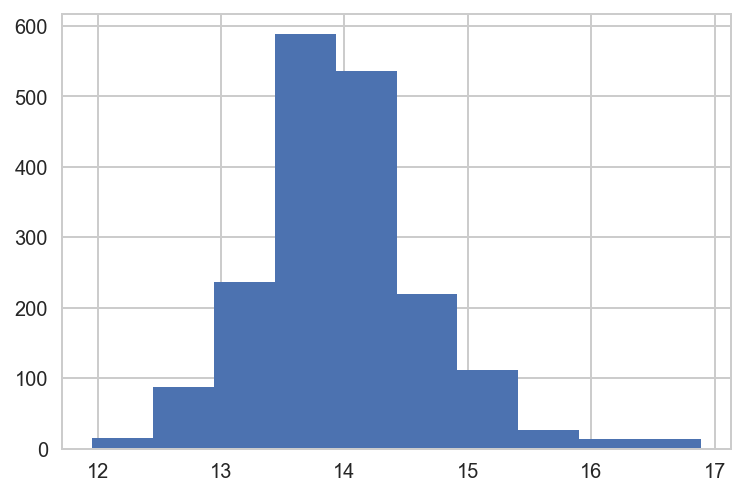

In [17]:
sns.set(style="whitegrid", color_codes=True, font_scale=1)
fig, ax = plt.subplots(figsize=(6,4))
plt.hist(y);

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1, shuffle=True)

Robust Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [19]:
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Pipelines

In [34]:
# Random Forest Regressor Pipeline and parameters
pipeline_RF = Pipeline([
    ('rfm', RandomForestRegressor()),
])

parameters_RF = {"rfm__max_depth": [3, 6, 10, 15, None],
              "rfm__max_features": ['sqrt', 'log2', None, 0.2, 0.5, 0.7],
              "rfm__min_samples_split": [2, 3, 10, 15, 20, 50, 100],
              "rfm__min_samples_leaf": [1, 3, 10, 15, 20, 50, 100],
              "rfm__bootstrap": [True, False],
                'rfm__n_estimators':[30]}

# SVR Pipeline and parameters
pipeline_LSVR = Pipeline([
    ('ss', RobustScaler()),
    ('lsvr', LinearSVR())
])

parameters_LSVR = {
'lsvr__C': np.logspace(-3, 1, 50),
'lsvr__loss': ('epsilon_insensitive', 'squared_epsilon_insensitive')}

# MLP Regressor pipeline and parameters
pipeline_MLP = Pipeline([
    ('rs', RobustScaler()),
    ('mlp', MLPRegressor(random_state=1, max_iter=800)),
])

parameters_MLP ={'mlp__hidden_layer_sizes':((50,), (75,), (100,), (150,), (200,)),
                 'mlp__solver':('sgd', 'adam'),
                 'mlp__activation':('relu', 'identity'),
                 'mlp__alpha':np.logspace(-3, 1, 10) }


#### Randon Forest Pipeline

In [76]:
gs = GridSearchCV(pipeline_RF, param_grid = parameters_RF , cv=3, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 2940 candidates, totalling 8820 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 614 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 1517 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2852 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3672 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4674 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5676 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 6809 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 7959 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 8820 out of 8820 | elapsed: 13.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('rfm', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'rfm__max_depth': [3, 6, 10, 15, None], 'rfm__max_features': ['sqrt', 'log2', None, 0.2, 0.5, 0.7], 'rfm__min_samples_split': [2, 3, 10, 15, 20, 50, 100], 'rfm__min_samples_leaf': [1, 3, 10, 15, 20, 50, 100], 'rfm__bootstrap': [True, False], 'rfm__n_estimators': [30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [78]:
print('Best Model Score:', gs.best_score_)
print('Best Parameters:', gs.best_params_)
print('Accuracy Score:', gs.best_estimator_.score(X_test, y_test))

Best Model Score: 0.49759668626199083
Best Parameters: {'rfm__bootstrap': True, 'rfm__max_depth': 10, 'rfm__max_features': 0.7, 'rfm__min_samples_leaf': 1, 'rfm__min_samples_split': 10, 'rfm__n_estimators': 30}
Accuracy Score: 0.5378816317267598


In [82]:
best_rf = gs.best_estimator_
best_rf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('rfm', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [83]:
best_rf.steps[0]

('rfm', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
            max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False))

In [84]:
best_rf.steps[0][1].estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=0.7,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1280014648, splitter='best')

In [85]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = StringIO()
export_graphviz(best_rf.steps[0][1].estimators_[0], out_file=dot_data,
                feature_names=X_train.columns,
#                 class_names=best_rf[0].feature_names,
               filled=True, rounded=True,
                proportion=True,
                special_characters=True,
                node_ids=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

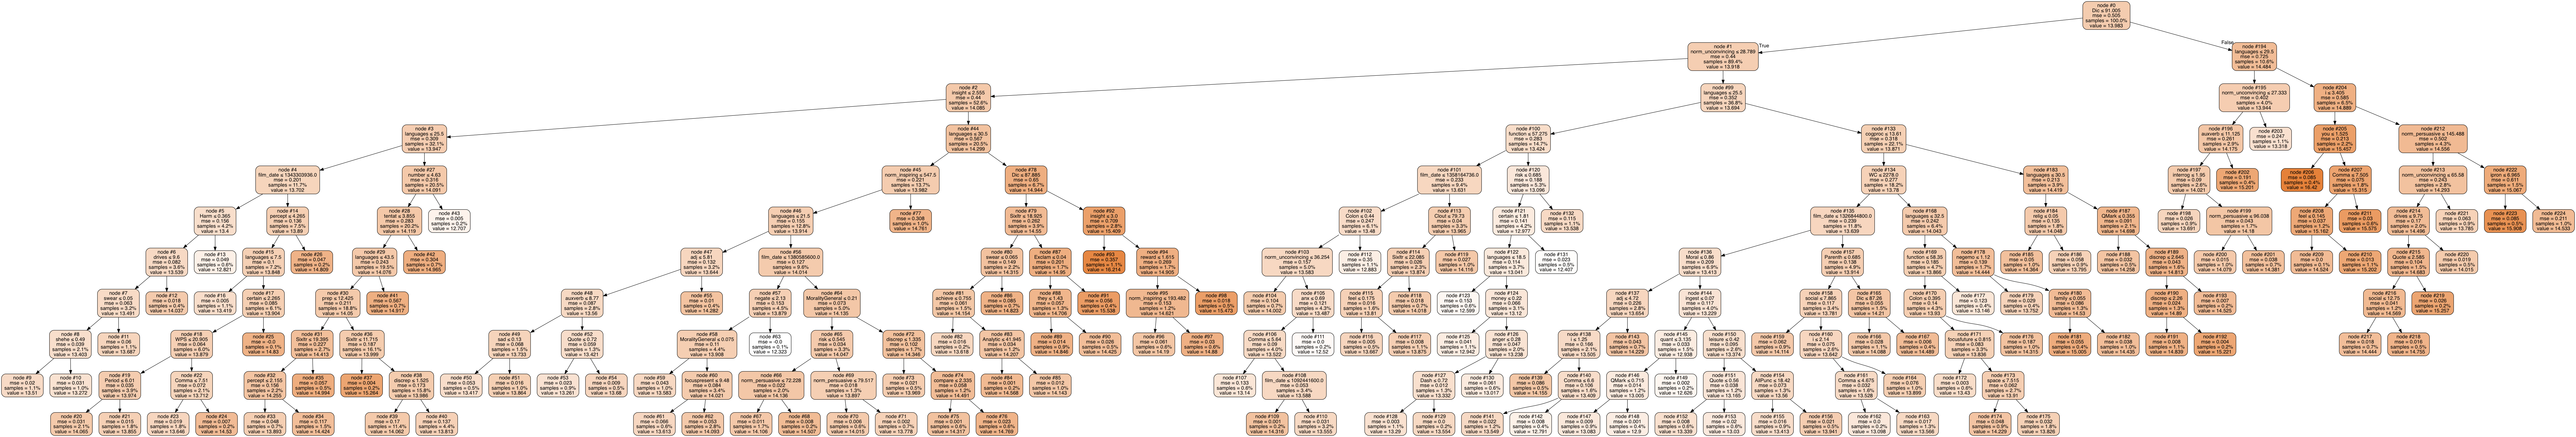

In [86]:
Image(graph.create_png())

In [89]:
feature_im = pd.DataFrame(data=best_rf.steps[0][1].estimators_[0].feature_importances_, index=X_test.columns, columns=['importance'])
feature_im.sort_values(by=['importance'], ascending=False ).head(20)

importance
languages            0.263432
norm_unconvincing    0.105259
Dic                  0.104493
insight              0.063533
film_date            0.049763
i                    0.034015
function             0.028780
cogproc              0.026500
norm_inspiring       0.019840
Sixltr               0.018631
number               0.017601
WC                   0.016839
tentat               0.016256
norm_persuasive      0.014764
auxverb              0.014731
ipron                0.014568
Colon                0.012694
Comma                0.011948
adj                  0.010155
percept              0.008780

#### LinearSVR Pipeline

In [273]:
gs_lsvr = GridSearchCV(pipeline_LSVR, param_grid = parameters_LSVR , cv=3, n_jobs=1, verbose=1)
gs_lsvr.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   23.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('ss', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lsvr', LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lsvr__C': array([1.00000e-03, 1.20679e-03, 1.45635e-03, 1.75751e-03, 2.12095e-03,
       2.55955e-03, 3.08884e-03, 3.72759e-03, 4.49843e-03, 5.42868e-03,
       6.55129e-03, 7.90604e-03, 9.54095e-03, 1.15140e-02, 1.38950e-02,
       1.67683e-02, 2.02359e-02, 2.44205e-02, 2.94705e-02, 3....0, 8.28643e+00, 1.00000e+01]), 'lsvr__loss': ('epsilon_insensitive', 'squared_epsilon_insensitive')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [275]:
print('Best Model Score:', gs_lsvr.best_score_)
print('Best Parameters:', gs_lsvr.best_params_)
print('Accuracy Score:', gs_lsvr.best_estimator_.score(X_test, y_test))

Best Model Score: 0.4241668684947723
Best Parameters: {'lsvr__C': 1.0481131341546852, 'lsvr__loss': 'squared_epsilon_insensitive'}
Accuracy Score: 0.5242510052044194


#### MLP Pipeline

In [32]:
gs_MLP = GridSearchCV(pipeline_MLP, param_grid = parameters_MLP , cv=3, n_jobs=1, verbose=2)
gs_MLP.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   1.1s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   1.2s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   1.1s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   1.7s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   1.8s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   1.7s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(75,), mlp__s

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   0.5s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   1.9s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   1.8s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   1.8s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.0s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   1.7s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   2.1s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   2.2s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   0.4s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   2.2s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   0.8s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   2.0s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   1.1s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   2.6s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   2.5s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   2.1s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   2.4s
[CV] mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(200,),

[CV]  mlp__activation=relu, mlp__alpha=0.0027825594022071257, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   2.2s
[CV] mlp__activation=relu, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   1.2s
[CV] mlp__activation=relu, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   1.2s
[CV] mlp__activation=relu, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   1.2s
[CV] mlp__activation=relu, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.007742636826811269, mlp__hidden

[CV]  mlp__activation=relu, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   2.1s
[CV] mlp__activation=relu, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   1.6s
[CV] mlp__activation=relu, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   1.6s
[CV] mlp__activation=relu, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   1.6s
[CV] mlp__activation=relu, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.021544346900318832, mlp__hidden_l

[CV]  mlp__activation=relu, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   2.7s
[CV] mlp__activation=relu, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.7s
[CV] mlp__activation=relu, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.0s
[CV] mlp__activation=relu, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.9s
[CV] mlp__activation=relu, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.05994842503189409, mlp__hidden_lay

[CV]  mlp__activation=relu, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   2.6s
[CV] mlp__activation=relu, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   3.3s
[CV] mlp__activation=relu, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   2.3s
[CV] mlp__activation=relu, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   2.7s
[CV] mlp__activation=relu, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   2.5s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   2.5s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   2.3s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   1.7s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   1.6s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   1.6s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_size

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   3.5s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   3.2s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.7s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.4s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.2s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   3.4s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   4.1s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   3.7s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   3.3s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   2.7s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   2.9s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   4.6s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   4.9s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   4.6s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   3.5s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   3.4s
[CV] mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 
[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_l

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   6.5s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   2.4s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   2.2s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   2.4s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   2.6s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   2.7s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   2.4s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   2.9s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   2.7s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   2.6s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   3.0s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   3.0s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   2.9s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   3.2s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   3.3s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   3.5s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   3.5s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   3.0s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   3.4s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   3.9s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   4.0s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   3.9s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   3.9s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   3.9s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   4.1s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   4.8s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   5.1s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   4.9s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   4.4s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   4.7s
[CV] mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   4.6s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   2.5s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   2.4s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   2.5s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   2.2s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   2.2s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   2.5s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   2.8s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   3.0s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   3.1s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   2.9s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   2.5s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   1.8s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.6s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   3.0s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.9s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   2.0s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   2.2s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   2.3s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   3.8s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   3.6s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   3.4s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   2.9s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   2.5s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   2.6s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   4.6s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   5.2s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   5.1s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   3.4s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   3.8s
[CV] mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   3.1s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   2.4s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   2.5s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   2.4s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   1.8s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   2.1s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   1.8s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   2.6s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   2.7s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   3.2s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   2.2s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   2.0s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   2.0s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   3.0s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   3.0s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.8s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   1.8s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   2.8s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   2.0s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   5.1s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   3.8s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   4.3s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   2.2s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   2.0s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   2.1s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   4.9s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   4.7s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   4.7s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   2.3s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   2.3s
[CV] mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=relu, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   2.2s
[CV] mlp__activation=identity, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=0.001, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   0.5s
[CV] mlp__activation=identity, mlp__alpha=0.001, mlp__hidden_layer_sizes=(

[CV]  mlp__activation=identity, mlp__alpha=0.0027825594022071257, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   0.9s
[CV] mlp__activation=identity, mlp__alpha=0.0027825594022071257, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=0.0027825594022071257, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   0.5s
[CV] mlp__activation=identity, mlp__alpha=0.0027825594022071257, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=0.0027825594022071257, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   0.5s
[CV] mlp__activation=identity, mlp__alpha=0.0027825594022071257, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=0.0027825594022071257, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   0.5s
[CV] mlp__activation=identity, mlp__alpha=0.0027825594022071257, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=identity, ml

[CV]  mlp__activation=identity, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   1.0s
[CV] mlp__activation=identity, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   0.9s
[CV] mlp__activation=identity, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   0.8s
[CV] mlp__activation=identity, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   0.5s
[CV] mlp__activation=identity, mlp__alpha=0.007742636826811269, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp_

[CV]  mlp__activation=identity, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   0.7s
[CV] mlp__activation=identity, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   0.8s
[CV] mlp__activation=identity, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   1.6s
[CV] mlp__activation=identity, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   1.1s
[CV] mlp__activation=identity, mlp__alpha=0.021544346900318832, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=identity,

[CV]  mlp__activation=identity, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   0.5s
[CV] mlp__activation=identity, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   0.5s
[CV] mlp__activation=identity, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   0.5s
[CV] mlp__activation=identity, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   0.9s
[CV] mlp__activation=identity, mlp__alpha=0.05994842503189409, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alph

[CV]  mlp__activation=identity, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   1.1s
[CV] mlp__activation=identity, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   0.6s
[CV] mlp__activation=identity, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   0.8s
[CV] mlp__activation=identity, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   0.6s
[CV] mlp__activation=identity, mlp__alpha=0.1668100537200059, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=0.16681

[CV]  mlp__activation=identity, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   1.3s
[CV] mlp__activation=identity, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=0.46415888336127775, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   1.4s
[CV] mlp__activation=identity, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   0.5s
[CV] mlp__activation=identity, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   0.6s
[CV] mlp__activation=identity, mlp__alpha=1.2915496650148828, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=1.291549

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   1.7s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   1.8s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   1.7s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   1.3s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   1.2s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   1.0s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   1.9s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   1.7s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   1.9s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   1.2s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   1.3s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   1.3s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.7s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.3s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=sgd, total=   2.3s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   1.5s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   1.4s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(100,), mlp__solver=adam, total=   1.4s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   2.7s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   2.7s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   2.6s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   1.3s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   1.6s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   1.5s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   3.2s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   3.4s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   3.5s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   1.3s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   1.7s
[CV] mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=3.593813663804626, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   1.4s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   1.7s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   1.7s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=sgd, total=   1.6s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   1.6s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(50,), mlp__solver=adam, total=   1.5s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidd

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   2.3s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   2.3s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=sgd, total=   2.3s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   1.2s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   1.1s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(75,), mlp__solver=adam, total=   1.2s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hi

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   2.6s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=sgd, total=   2.6s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   1.2s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   1.5s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(150,), mlp__solver=adam, total=   1.6s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   3.1s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   3.0s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=sgd, total=   3.1s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   1.3s
[CV] mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=adam 
[CV]  mlp__activation=identity, mlp__alpha=10.0, mlp__hidden_layer_sizes=(200,), mlp__solver=adam, total=   1.8s
[CV] mlp__activation=identity, mlp__alpha=10.0, 

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 17.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('rs', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('mlp', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learnin...       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'mlp__hidden_layer_sizes': ((50,), (75,), (100,), (150,), (200,)), 'mlp__solver': ('sgd', 'adam'), 'mlp__activation': ('relu', 'identity'), 'mlp__alpha': array([1.00000e-03, 2.78256e-03, 7.74264e-03, 2.15443e-02, 5.99484e-02,
       1.66810e-01, 4.64159e-01, 1.29155e+00, 3.59381e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [33]:
print('Best Model Score:', gs_MLP.best_score_)
print('Best Parameters:', gs_MLP.best_params_)
print('Accuracy Score:', gs_MLP.best_estimator_.score(X_test, y_test))

Best Model Score: 0.4390237902629409
Best Parameters: {'mlp__activation': 'identity', 'mlp__alpha': 10.0, 'mlp__hidden_layer_sizes': (50,), 'mlp__solver': 'sgd'}
Accuracy Score: 0.5211772066708409


In [ ]:
#### Linear Models

In [173]:
# using Robust Scaler 
rs = RobustScaler()

In [174]:
rs.fit(X_train)
X_train_s = rs.transform(X_train)
X_test_s = rs.transform(X_test)

In [175]:
lr = LinearRegression()
lr.fit(X_train_s, y_train)
cross_val_score(lr, X_train_s, y_train, cv = 6).mean()

0.4516247222028547

In [176]:
# finding the best alpha on the training set
alpha_values = np.logspace(-3,3,50)
mod_ridge = RidgeCV(alphas=alpha_values,  cv=6)
mod_ridge.fit(X_train_s, y_train)
best_alpha = mod_ridge.alpha_

# creating another ridge model with the best alpha to test it again on the training set
best_r_m = Ridge(alpha = best_alpha)
print('Scores: ', cross_val_score(best_r_m, X_train_s, y_train, cv=6))
print('Mean Score: ', cross_val_score(best_r_m, X_train_s, y_train, cv=6).mean())

Scores:  [0.49983239 0.41766622 0.52143078 0.44414168 0.51991947 0.37720289]
Mean Score:  0.4633655694939438


In [177]:
# finding the best alpha on the training set
mod_lasso = LassoCV(n_alphas = 500, alphas=np.logspace(-3,3,100), cv=6)
mod_lasso.fit(X_train_s, y_train)

# creating another lasso model with the best alpha
best_alpha = mod_lasso.alpha_
best_lm = Lasso(alpha=best_alpha)
print('Scores: ', cross_val_score(best_lm, X_train_s, y_train, cv=6))
print('Mean Score: ', cross_val_score(best_lm, X_train_s, y_train, cv=6).mean())

Scores:  [0.51232891 0.4258184  0.52377287 0.44269957 0.51295769 0.40780161]
Mean Score:  0.47089651011780614


In [178]:
best_lm.fit(X_train_s, y_train).score(X_test_s, y_test)

0.5348177109845036

In [179]:
len(best_lm.coef_)

98

In [102]:
Lasso_coef = pd.DataFrame({'variable': X.columns, 'Lasso_coef': best_lm.coef_, 'abs_coef': np.abs(best_lm.coef_)})
Lasso_coef.sort_values('abs_coef', ascending=False).head()

Lasso_coef  abs_coef   variable
1     0.446698  0.446698  languages
7     0.277732  0.277732         WC
0     0.261991  0.261991  film_date
62   -0.109209  0.109209  focuspast
88    0.109035  0.109035    Parenth

## Predicting the Persuasiveness

In [727]:
y = df_.norm_inspiring
X = X = df_[['film_date', 'languages','music',
         'conversation','norm_persuasive','norm_unconvincing', 'WC','Analytic',
         'Clout','Authentic','Tone','WPS','Sixltr','Dic','function','i','you','shehe','they','ipron',
         'article','prep','auxverb','adverb','conj','negate','verb','adj','compare','interrog','number',
        'quant','posemo','negemo','anx','anger','sad','social','family','friend','female','cogproc',
        'insight','cause','discrep','tentat','certain','differ','percept','hear','feel','bio','body',
        'health','sexual','ingest','drives','achieve','power','reward','risk','focuspast','focuspresent',
        'focusfuture','motion','space','time','work','leisure','home','money','relig','death','informal',
        'swear','netspeak','filler','AllPunc','Period','Comma','Colon','SemiC','QMark','Exclam','Dash','Quote',
        'Apostro','Parenth','OtherP','Moral','MoralityGeneral','Harm','Fairness','Purity','Ingroup','Authority',
        'gender'
         ]]

In [728]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
rs = RobustScaler()
rs.fit(X_train)
X_train_s = rs.transform(X_train)
X_test_s = rs.transform(X_test)

In [729]:
lr = LinearRegression()
lr.fit(X_train_s, y_train)
cross_val_score(lr, X_train_s, y_train, cv = 3).mean()

0.3646819890629092

In [730]:
# finding the best alpha on the training set
alpha_values = np.logspace(-3,3,50)
mod_ridge = RidgeCV(alphas=alpha_values,  cv=6)
mod_ridge.fit(X_train_s, y_train)
best_alpha = mod_ridge.alpha_

# creating another ridge model with the best alpha to test it again on the training set
best_r_m = Ridge(alpha = best_alpha)
print('Scores: ', cross_val_score(best_r_m, X_train_s, y_train, cv=6))
print('Mean Score: ', cross_val_score(best_r_m, X_train_s, y_train, cv=6).mean())

Scores:  [0.40684419 0.45093706 0.47199134 0.41056582 0.3596564  0.3671715 ]
Mean Score:  0.4111943854241586


In [731]:
# finding the best alpha on the training set
mod_lasso = LassoCV(n_alphas = 500, alphas=np.logspace(-3,3,100), cv=3, )
mod_lasso.fit(X_train_s, y_train)

# creating another lasso model with the best alpha
best_alpha = mod_lasso.alpha_
best_lm = Lasso(alpha=best_alpha)
print('Scores: ', cross_val_score(best_lm, X_train_s, y_train, cv=6))
print('Mean Score: ', cross_val_score(best_lm, X_train_s, y_train, cv=6).mean())

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Scores:  [0.42029946 0.46302964 0.46470039 0.41148944 0.36120282 0.38581614]
Mean Score:  0.417756316921579


## Predicting Gender

In [114]:
y = df_.gender

In [115]:
y.mean()

0.6776814734561214

In [116]:
X = df_[['film_date', 'languages','music',
         'conversation','norm_persuasive','norm_unconvincing', 'WC','Analytic',
         'Clout','Authentic','Tone','WPS','Sixltr','Dic','function','i','you','shehe','they','ipron',
         'article','prep','auxverb','adverb','conj','negate','verb','adj','compare','interrog','number',
        'quant','posemo','negemo','anx','anger','sad','social','family','friend','female','cogproc',
        'insight','cause','discrep','tentat','certain','differ','percept','hear','feel','bio','body',
        'health','sexual','ingest','drives','achieve','power','reward','risk','focuspast','focuspresent',
        'focusfuture','motion','space','time','work','leisure','home','money','relig','death','informal',
        'swear','netspeak','filler','AllPunc','Period','Comma','Colon','SemiC','QMark','Exclam','Dash','Quote',
        'Apostro','Parenth','OtherP','Moral','MoralityGeneral','Harm','Fairness','Purity','Ingroup','Authority'
         ]]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1, stratify=y)
rs = RobustScaler()
rs.fit(X_train)
X_train_s = rs.transform(X_train)
X_test_s = rs.transform(X_test)

### Pipelines

In [118]:
pipeline_RFC = Pipeline([
    ('rfc', RandomForestClassifier(n_estimators=30)),
])

parameters_RFC = {"rfc__max_depth": (3, 6, 10, 15, None),
              "rfc__max_features": ('sqrt', 'log2', None, 0.2, 0.5, 0.7),
              "rfc__min_samples_split": (2, 3, 10, 20, 50),
              "rfc__min_samples_leaf": (1, 3, 10, 20, 50),
              "rfc__bootstrap": (True, False),
              "rfc__criterion": ("gini", "entropy")}

In [ ]:
df_.size

#### Random Forest Classifier Pipeline

In [119]:
gs_rfc = GridSearchCV(pipeline_RFC, param_grid = parameters_RFC, cv=3, n_jobs=-1, verbose=1)
gs_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 3000 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 1114 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1574 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2132 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2819 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3569 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4427 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 5377 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 6427 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 7577 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 8827 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed: 20.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'rfc__max_depth': (3, 6, 10, 15, None), 'rfc__max_features': ('sqrt', 'log2', None, 0.2, 0.5, 0.7), 'rfc__min_samples_split': (2, 3, 10, 20, 50), 'rfc__min_samples_leaf': (1, 3, 10, 20, 50), 'rfc__bootstrap': (True, False), 'rfc__criterion': ('gini', 'entropy')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [120]:
# Model Scores, best parameters and the intercept
print('Best Model Score:', gs_rfc.best_score_)
print('Best Parameters:', gs_rfc.best_params_)
print('Accuracy Score:', gs_rfc.best_estimator_.score(X_test, y_test))

Best Model Score: 0.7321981424148607
Best Parameters: {'rfc__bootstrap': False, 'rfc__criterion': 'entropy', 'rfc__max_depth': None, 'rfc__max_features': 0.5, 'rfc__min_samples_leaf': 10, 'rfc__min_samples_split': 3}
Accuracy Score: 0.703971119133574


In [122]:
best_rf = gs_rfc.best_estimator_
best_rf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('rfc', RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=0.5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [123]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = StringIO()
export_graphviz(best_rf.steps[0][1].estimators_[0], out_file=dot_data,
                feature_names=X_train.columns,
#                 class_names=best_rf[0].feature_names,
               filled=True, rounded=True,
                proportion=True,
                special_characters=True,
                node_ids=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

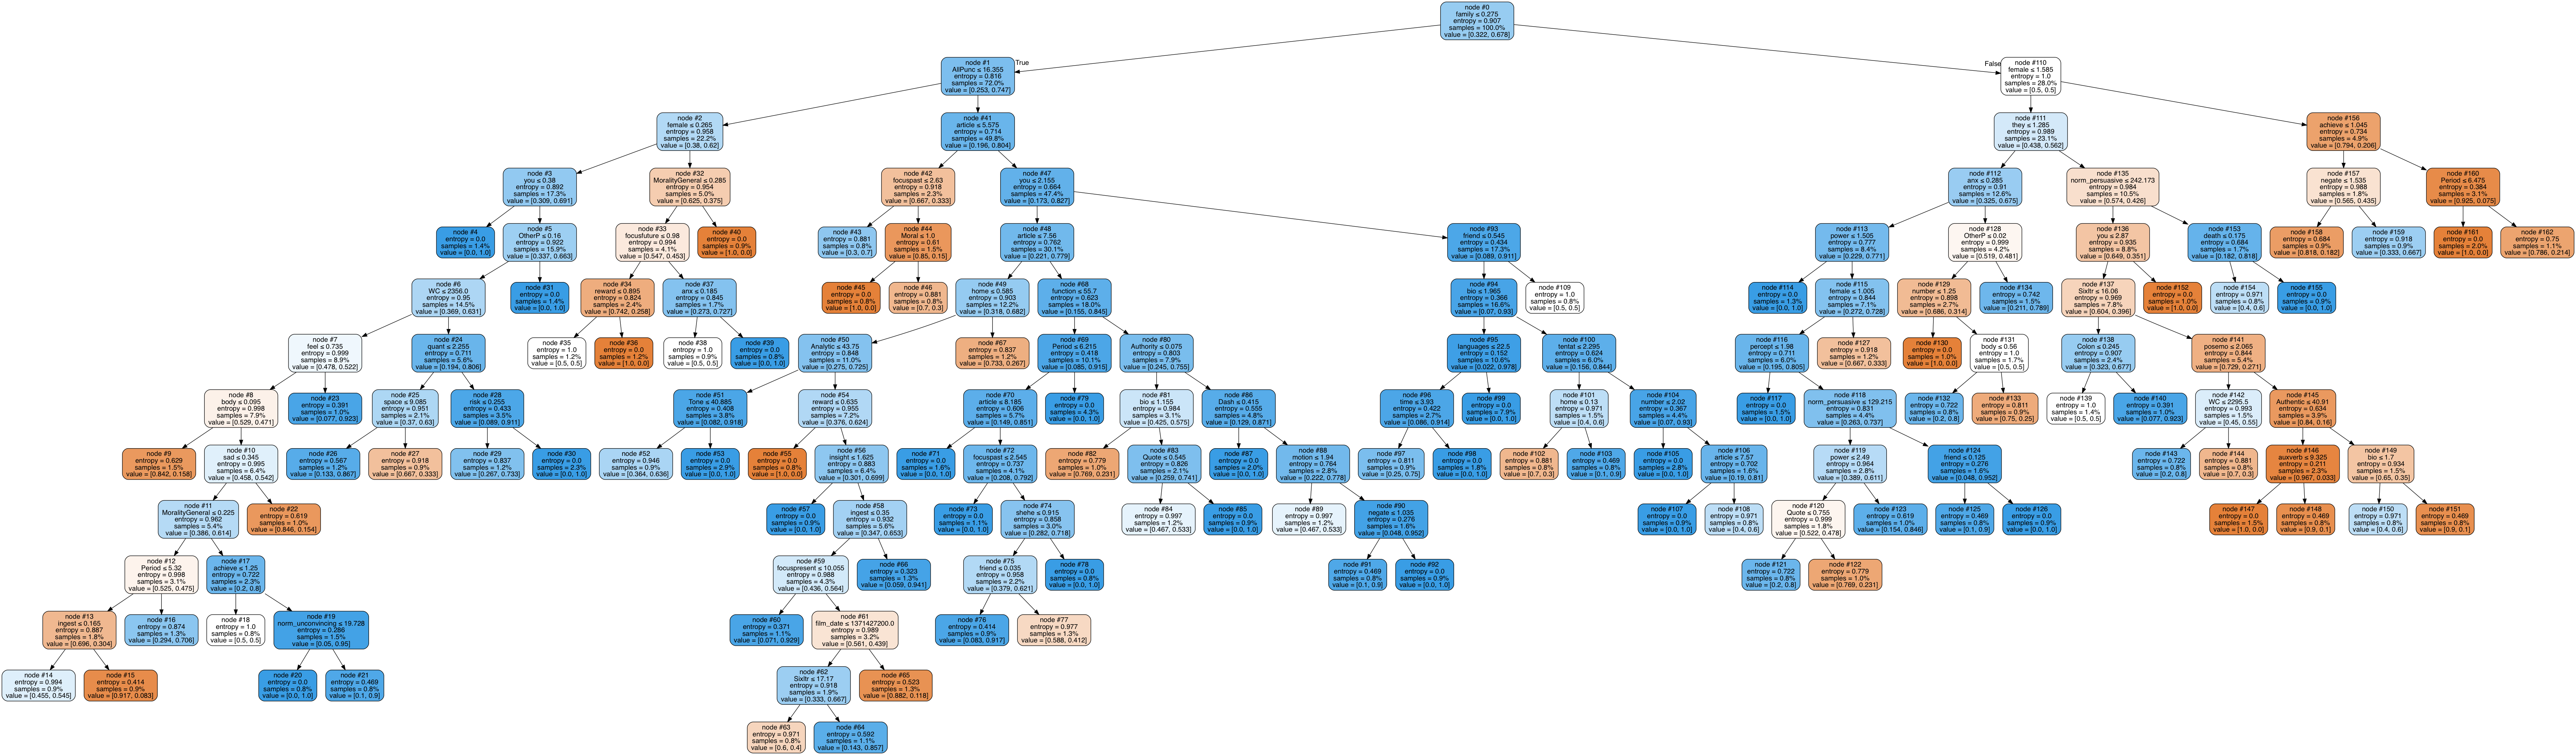

In [124]:
Image(graph.create_png())

In [129]:
feature_im = pd.DataFrame(data=best_rf.steps[0][1].estimators_[0].feature_importances_, index=X_test.columns, columns=['importance'])
feature_im.sort_values(by=['importance'], ascending=False).head(20)

importance
family             0.074563
article            0.066525
female             0.064484
you                0.047552
reward             0.036873
AllPunc            0.036043
bio                0.030382
OtherP             0.028896
norm_persuasive    0.028086
Period             0.027962
anx                0.023899
friend             0.023702
number             0.022860
WC                 0.022662
Sixltr             0.021584
home               0.021529
MoralityGeneral    0.020808
achieve            0.020710
they               0.019821
Quote              0.019018

In [130]:

gs_params = {'penalty':['l1','l2'],
             'solver':['liblinear'],
             'C':np.logspace(-5,3,50)}
mod_2 = GridSearchCV(LogisticRegression(), gs_params, cv=3, verbose=1)
mod_2.fit(X_train_s, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': array([1.00000e-05, 1.45635e-05, 2.12095e-05, 3.08884e-05, 4.49843e-05,
       6.55129e-05, 9.54095e-05, 1.38950e-04, 2.02359e-04, 2.94705e-04,
       4.29193e-04, 6.25055e-04, 9.10298e-04, 1.32571e-03, 1.93070e-03,
       2.81177e-0... 1.04811e+02, 1.52642e+02,
       2.22300e+02, 3.23746e+02, 4.71487e+02, 6.86649e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [772]:
# Model Scores, best parameters and the intercept
print('Best Model Score:', mod_2.best_score_)
print('Best Parameters:', mod_2.best_params_)
print('Accuracy Score:', mod_2.best_estimator_.score(X_test_s, y_test))
print('Coefficient:', mod_2.best_estimator_.intercept_)

Best Model Score: 0.7213622291021672
Best Parameters: {'C': 0.026826957952797246, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score: 0.7292418772563177
Coefficient for Houston: [0.38722152]


In [136]:
mod_2.best_estimator_.coef_

array([[-2.12242787e-01, -5.34352564e-03,  0.00000000e+00,
         0.00000000e+00,  8.83944953e-02, -6.68137654e-02,
         4.56077441e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.19285692e-02,  0.00000000e+00,
        -5.77956683e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.08462462e-01,  1.97307860e-01,
        -8.58803740e-02,  1.19063346e-01,  4.35009037e-01,
         0.00000000e+00,  0.00000000e+00,  6.95923907e-02,
        -2.29901027e-01, -5.89834937e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.39103694e-01,  1.36310264e-01, -4.16606121e-03,
         0.00000000e+00, -9.61522212e-02,  0.00000000e+00,
         0.00000000e+00, -4.14299323e-02, -8.68718779e-02,
         0.00000000e+00, -3.09978093e-01,  0.00000000e+00,
         0.00000000e+00,  9.51115476e-02,  2.91977553e-02,
         9.13661297e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.42542410e-0

In [131]:
from sklearn.neighbors.classification import KNeighborsClassifier
knn_params = {'n_neighbors':[3,9,12,15,25],
             'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']}
mod_3 = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, n_jobs=-1, verbose=1)
mod_3.fit(X_train_s, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [3, 9, 12, 15, 25], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [132]:
# Model Scores, best parameters and the intercept
print('Best Model Score:', mod_3.best_score_)
print('Best Parameters:', mod_3.best_params_)
print('Accuracy Score:', mod_3.best_estimator_.score(X_test_s, y_test))

Best Model Score: 0.6996904024767802
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'}
Accuracy Score: 0.6967509025270758


In [133]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_auc_score

In [134]:
mod3_yhat = mod_3.best_estimator_.predict(X_test)
confusion = confusion_matrix(y_test, mod3_yhat, labels=[1,0])
pd.DataFrame(confusion, columns=['pred_male', 'pred_female'], index=['male', 'female'])

pred_male  pred_female
male          369            6
female        174            5

### Multilabel Classification using the text scripts

In [36]:
X = df.transcript
y = df.gender

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [249]:
from gensim.models.word2vec import Word2Vec
from gensim.models.fasttext import FastText
from gensim.models.doc2vec import Doc2Vec
import nltk

In [235]:
stoplist = nltk.corpus.stopwords.words('english')
texts = [[word for word in gensim.utils.simple_preprocess(row) if word not in stoplist] for row in df.transcript.get_values()]

In [212]:
model = Word2Vec(texts, size=100, window=5, min_count=5, workers=4).train

In [20]:
# model.wv.vocab

In [21]:
# model.wv.most_similar(['school'])

In [230]:
# model2 = FastText(texts, size=100, window=5, min_count=5, workers=4,sg=1)

In [22]:
# model2.wv.most_similar('Gastrorology')

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [43]:
pipeline_lr  = Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('lr', LogisticRegression(solver='liblinear'))])
parameters_lr = {
#     'vect__max_df': (0.5, 0.75),
#     'vect__max_features': (None, 5000, 10000),
#     'vect__ngram_range': ((1, 1), (1, 2)),  
#     'tfidf__use_idf': (True, False),
#     'tfidf__norm': ('l1', 'l2'),
    'lr__penalty':('l1','l2'),
#              'lr__solver':('liblinear'),
             'lr__C':np.logspace(-5,3,50)}

In [44]:
gr_lr = GridSearchCV(pipeline_lr, parameters_lr, cv=3, n_jobs=-1, verbose=2)
gr_lr.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] lr__C=1e-05, lr__penalty=l1 .....................................
[CV] lr__C=1e-05, lr__penalty=l1 .....................................
[CV] lr__C=1e-05, lr__penalty=l1 .....................................
[CV] lr__C=1e-05, lr__penalty=l2 .....................................
[CV] ...................... lr__C=1e-05, lr__penalty=l1, total=   4.1s
[CV] ...................... lr__C=1e-05, lr__penalty=l1, total=   4.0s
[CV] lr__C=1e-05, lr__penalty=l2 .....................................
[CV] lr__C=1e-05, lr__penalty=l2 .....................................
[CV] ...................... lr__C=1e-05, lr__penalty=l1, total=   4.0s
[CV] lr__C=1.4563484775012445e-05, lr__penalty=l1 ....................
[CV] ...................... lr__C=1e-05, lr__penalty=l2, total=   4.0s
[CV] lr__C=1.4563484775012445e-05, lr__penalty=l1 ....................
[CV] ...................... lr__C=1e-05, lr__penalty=l2, total=   3.6s
[CV] .........

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   56.4s


[CV] ....... lr__C=6.55128556859551e-05, lr__penalty=l2, total=   3.9s
[CV] ....... lr__C=6.55128556859551e-05, lr__penalty=l2, total=   3.7s
[CV] lr__C=9.540954763499944e-05, lr__penalty=l1 .....................
[CV] ....... lr__C=6.55128556859551e-05, lr__penalty=l2, total=   3.7s
[CV] lr__C=9.540954763499944e-05, lr__penalty=l1 .....................
[CV] lr__C=9.540954763499944e-05, lr__penalty=l2 .....................
[CV] ...... lr__C=9.540954763499944e-05, lr__penalty=l1, total=   3.7s
[CV] lr__C=9.540954763499944e-05, lr__penalty=l2 .....................
[CV] ...... lr__C=9.540954763499944e-05, lr__penalty=l1, total=   3.6s
[CV] lr__C=9.540954763499944e-05, lr__penalty=l2 .....................
[CV] ...... lr__C=9.540954763499944e-05, lr__penalty=l1, total=   3.5s
[CV] ...... lr__C=9.540954763499944e-05, lr__penalty=l2, total=   3.5s
[CV] lr__C=0.00013894954943731373, lr__penalty=l1 ....................
[CV] lr__C=0.00013894954943731373, lr__penalty=l1 ....................
[CV] .

[CV] ....... lr__C=0.002811768697974228, lr__penalty=l1, total=   3.5s
[CV] lr__C=0.002811768697974228, lr__penalty=l2 ......................
[CV] ....... lr__C=0.002811768697974228, lr__penalty=l1, total=   3.9s
[CV] lr__C=0.004094915062380423, lr__penalty=l1 ......................
[CV] ....... lr__C=0.002811768697974228, lr__penalty=l2, total=   3.8s
[CV] lr__C=0.004094915062380423, lr__penalty=l1 ......................
[CV] ....... lr__C=0.002811768697974228, lr__penalty=l2, total=   3.7s
[CV] lr__C=0.004094915062380423, lr__penalty=l1 ......................
[CV] ....... lr__C=0.002811768697974228, lr__penalty=l2, total=   3.7s
[CV] lr__C=0.004094915062380423, lr__penalty=l2 ......................
[CV] ....... lr__C=0.004094915062380423, lr__penalty=l1, total=   3.8s
[CV] ....... lr__C=0.004094915062380423, lr__penalty=l1, total=   3.7s
[CV] lr__C=0.004094915062380423, lr__penalty=l2 ......................
[CV] lr__C=0.004094915062380423, lr__penalty=l2 ......................
[CV] .

[CV] ........ lr__C=0.08286427728546843, lr__penalty=l2, total=   5.1s
[CV] lr__C=0.1206792640639329, lr__penalty=l2 ........................
[CV] ......... lr__C=0.1206792640639329, lr__penalty=l1, total=   5.0s
[CV] ......... lr__C=0.1206792640639329, lr__penalty=l1, total=   5.1s
[CV] lr__C=0.1206792640639329, lr__penalty=l2 ........................
[CV] lr__C=0.1206792640639329, lr__penalty=l2 ........................
[CV] ......... lr__C=0.1206792640639329, lr__penalty=l1, total=   4.1s
[CV] lr__C=0.17575106248547895, lr__penalty=l1 .......................
[CV] ......... lr__C=0.1206792640639329, lr__penalty=l2, total=   4.0s
[CV] lr__C=0.17575106248547895, lr__penalty=l1 .......................


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min


[CV] ......... lr__C=0.1206792640639329, lr__penalty=l2, total=   3.9s
[CV] ......... lr__C=0.1206792640639329, lr__penalty=l2, total=   3.9s
[CV] lr__C=0.17575106248547895, lr__penalty=l1 .......................
[CV] lr__C=0.17575106248547895, lr__penalty=l2 .......................
[CV] ........ lr__C=0.17575106248547895, lr__penalty=l1, total=   3.8s
[CV] ........ lr__C=0.17575106248547895, lr__penalty=l1, total=   4.0s
[CV] lr__C=0.17575106248547895, lr__penalty=l2 .......................
[CV] lr__C=0.17575106248547895, lr__penalty=l2 .......................
[CV] ........ lr__C=0.17575106248547895, lr__penalty=l1, total=   3.8s
[CV] lr__C=0.2559547922699533, lr__penalty=l1 ........................
[CV] ........ lr__C=0.17575106248547895, lr__penalty=l2, total=   3.7s
[CV] lr__C=0.2559547922699533, lr__penalty=l1 ........................
[CV] ........ lr__C=0.17575106248547895, lr__penalty=l2, total=   4.2s
[CV] ........ lr__C=0.17575106248547895, lr__penalty=l2, total=   4.2s
[CV] l

[CV] .......... lr__C=5.179474679231202, lr__penalty=l1, total=   3.9s
[CV] lr__C=7.543120063354607, lr__penalty=l1 .........................
[CV] .......... lr__C=5.179474679231202, lr__penalty=l2, total=   3.8s
[CV] lr__C=7.543120063354607, lr__penalty=l1 .........................
[CV] .......... lr__C=5.179474679231202, lr__penalty=l2, total=   3.7s
[CV] lr__C=7.543120063354607, lr__penalty=l1 .........................
[CV] .......... lr__C=5.179474679231202, lr__penalty=l2, total=   3.6s
[CV] lr__C=7.543120063354607, lr__penalty=l2 .........................
[CV] .......... lr__C=7.543120063354607, lr__penalty=l1, total=   3.9s
[CV] .......... lr__C=7.543120063354607, lr__penalty=l1, total=   3.9s
[CV] lr__C=7.543120063354607, lr__penalty=l2 .........................
[CV] lr__C=7.543120063354607, lr__penalty=l2 .........................
[CV] .......... lr__C=7.543120063354607, lr__penalty=l1, total=   3.8s
[CV] lr__C=10.985411419875572, lr__penalty=l1 ........................
[CV] .

[CV] .......... lr__C=222.2996482526191, lr__penalty=l1, total=   4.2s
[CV] .......... lr__C=222.2996482526191, lr__penalty=l1, total=   4.1s
[CV] lr__C=222.2996482526191, lr__penalty=l2 .........................
[CV] lr__C=222.2996482526191, lr__penalty=l2 .........................
[CV] .......... lr__C=222.2996482526191, lr__penalty=l1, total=   4.2s
[CV] .......... lr__C=222.2996482526191, lr__penalty=l2, total=   4.2s
[CV] lr__C=323.745754281764, lr__penalty=l1 ..........................
[CV] lr__C=323.745754281764, lr__penalty=l1 ..........................
[CV] .......... lr__C=222.2996482526191, lr__penalty=l2, total=   4.1s
[CV] .......... lr__C=222.2996482526191, lr__penalty=l2, total=   4.0s
[CV] lr__C=323.745754281764, lr__penalty=l1 ..........................
[CV] lr__C=323.745754281764, lr__penalty=l2 ..........................
[CV] ........... lr__C=323.745754281764, lr__penalty=l1, total=   4.1s
[CV] ........... lr__C=323.745754281764, lr__penalty=l1, total=   3.9s
[CV] l

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'lr__penalty': ('l1', 'l2'), 'lr__C': array([1.00000e-05, 1.45635e-05, 2.12095e-05, 3.08884e-05, 4.49843e-05,
       6.55129e-05, 9.54095e-05, 1.38950e-04, 2.02359e-04, 2.94705e-04,
       4.29193e-04, 6.25055e-04, 9.10298e-04, 1.32571e-03, 1.93070e-03,
       2.81177e-03, 4.09492e-03, 5... 1.04811e+02, 1.52642e+02,
       2.22300e+02, 3.23746e+02, 4.71487e+02, 6.86649e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_tr

In [46]:
print('Best Model Score:', gr_lr.best_score_)
print('Best Parameters:', gr_lr.best_params_)
print('Accuracy Score:', gr_lr.best_estimator_.score(X_test, y_test))

Best Model Score: 0.7288941736028538
Best Parameters: {'lr__C': 10.985411419875572, 'lr__penalty': 'l2'}
Accuracy Score: 0.7073509015256588


In [49]:
!pip install scikit-multilearn

In [81]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.multiclass import OneVsRestClassifier

In [82]:
y = df[list(df.columns)[139:161]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
pipeline_rfcml = Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                       ('rfcml', OneVsRestClassifier(RandomForestClassifier(n_estimators=200)))
                        ])

parameters_rfcml= {"rfcml__estimator__max_depth": (3, 6, 10, 15, None),
              "rfcml__estimator__max_features": ('sqrt', 'log2', None, 0.2, 0.5, 0.7),
              "rfcml__estimator__min_samples_split": (2, 3, 10, 20, 50),
              "rfcml__estimator__min_samples_leaf": (1, 3, 10, 20, 50),
              "rfcml__estimator__bootstrap": (True, False),
              "rfcml__estimator__criterion": ("gini", "entropy")
                }

In [ ]:
for category in list(y.columns):
    gr_rfml = GridSearchCV(pipeline_rfcml, parameters_rfcml, cv=3, n_jobs=-1, verbose=1)
    gr_rfml.fit(X_train, y_train[category])
    prediction = pipeline_rfcml.best_estimator_.predict(X_test)
    print('Best Model Score for {}:'.format(category), gr_rfml.best_score_)
    print('Best Parameters for {}:'.format(category), gr_rfml.best_params_)
    print('Accuracy Score: for {}'.format(category), gr_rfml.best_estimator_.score(X_test, y_test))
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))

Fitting 3 folds for each of 3000 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min


In [51]:
# gr_rfc = GridSearchCV(pipeline_rfc, parameters_rfc, cv=3, n_jobs=-1, verbose=2)
# gr_rfc.fit(X_train, y_train)